# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнила студентка гр. 3385 Мучник Мария Константиновна. Вариант №10.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации, отображения и анализа сетей аффилированности.

## Основные теоретические положения

### 1. Двудольные сети

Сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$

### 2. Проекции двудольной сети

- *Проекция на акторов* ($P_1$): $A_1 = B B^T - D_1$
- *Проекция на события* ($P_2$): $A_2 = B^T B - D_2$

где $D_1$, $D_2$ - диагональные матрицы степеней.

### 3. Меры центральности

#### Центральность по степени (нормированная)
$$
C_D^{'}(n_i) = \frac{C_D(n_i)}{N-1}
$$

#### Центральность по близости (нормированный)
$$
C_C^{'}(n_i) = \frac{N-1}{\sum_{j \neq i} d(n_i,n_j)}
$$

#### Центральность по посредничеству (нормированная)
$$
C_B^{'}(n_i) = \frac{\sum_{j < k} \frac{\sigma_{jk}(n_i)}{\sigma_{jk}}}{\frac{(N-1)(N-2)}{2}}
$$
где $\sigma_{jk}$ — количество кратчайших путей между $j$ и $k$,  
$\sigma_{jk}(n_i)$ — количество таких путей, проходящих через $i$.

#### Центральность по информации
$$
C_I(n_i) = \frac{1}{c_{ii} + \frac{T - 2R}{g}}
$$

#### Центральность по информации (нормированная)
$$
C_I^{'}(n_i) = \frac{C_I(n_i)}{\sum_{i} C_I(n_i)}
$$


### 4. Групповые характеристики сетей

#### Централизация по степени
$$
C_D = \frac{\sum_{i=1}^g [C_D(n^*) - C_D(n_i)]}{(g-1)(g-2)}
$$
где $C_D(n^*)$ - максимальная степень центральности, $g$ - число вершин.

#### Централизация по близости
$$
C_C = \frac{\sum_{i=1}^g [C'_C(n^*) - C'_C(n_i)]}{[(g-2)(g-1)]/(2g-3)}
$$

#### Централизация по посредничеству
$$
C_B = \frac{\sum_{i=1}^g [C'_B(n^*) - C'_B(n_i)]}{g-1}
$$


### 5. K-ядра

$k$-ядро - максимальный подграф, где $\deg(v) \geq k$ для всех $v \in V$.

### 6. Отношение шансов (Odds Ratio)

Для таблицы сопряженности:

| | Участвует в $j$ | Не участвует в $j$ |
|-|-----------------|-------------------|
| Участвует в $i$ | $a$ | $b$ |
| Не участвует в $i$ | $c$ | $d$ |

$$
OR = \frac{a \cdot d}{b \cdot c}, \quad LOR = \ln(OR)
$$

### 7. Плотность сети

$$
\rho = \frac{2|E|}{|V|(|V|-1)} \quad
$$

### 8. Диаметр сети

$$
\text{d} = \max_{u,v \in V} d(u,v)
$$

где $d(u,v)$ - геодезическое расстояние.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Импорт библиотек, извлечение социоматрицы и вывод её на экран

In [ ]:
system('sudo apt-get install -y libglpk-dev libgmp-dev')
# Для работы на виртуальной машине

install.packages("igraph", repos = "https://cloud.r-project.org/")
install.packages("statnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘coda’, ‘ergm.multi’, ‘Rdpack’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘networkLite’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’




In [ ]:
library(igraph)
library(statnet)

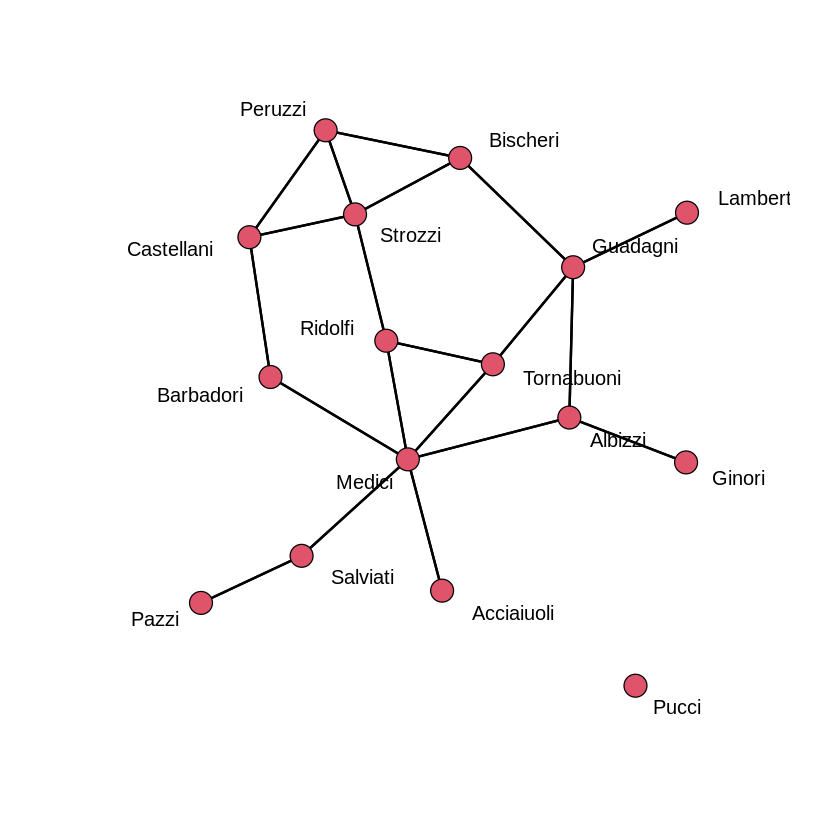

In [57]:
data <- read.csv("florentine_marital.csv",  skip = 1)
inet <- graph_from_adjacency_matrix(as.matrix(data))
sociomatrix <- as.matrix(as_adjacency_matrix(inet))

# Алгоритм Фрюхтермана—Рейнгольда
gplot(sociomatrix, gmode="graph", mode="fruchtermanreingold", displaylabels=TRUE)

### 2. Поиск точек сочленения и мостов сети

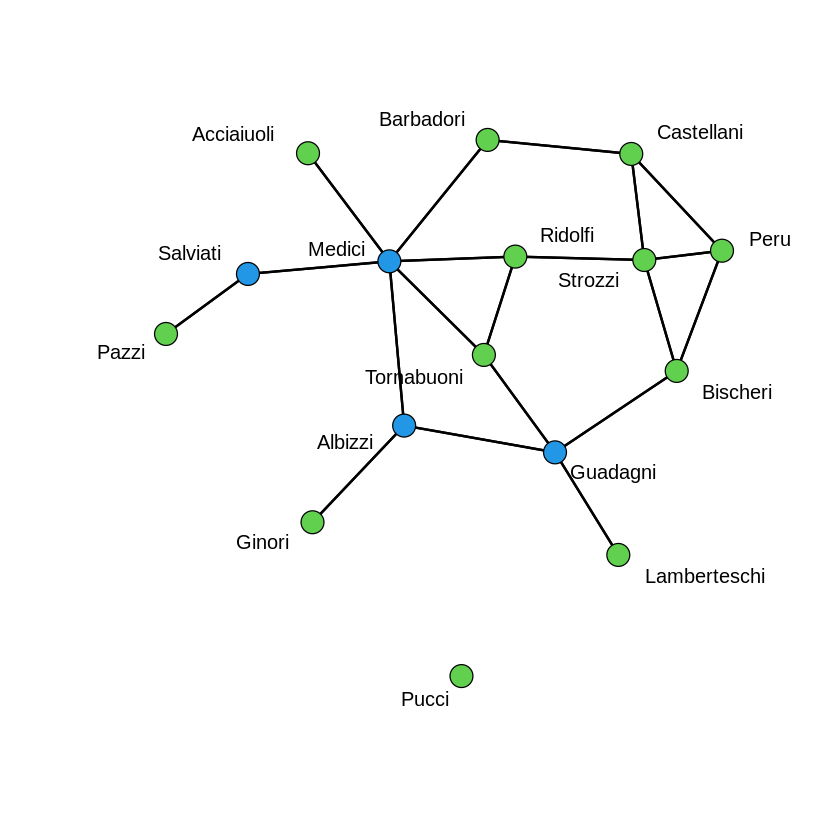

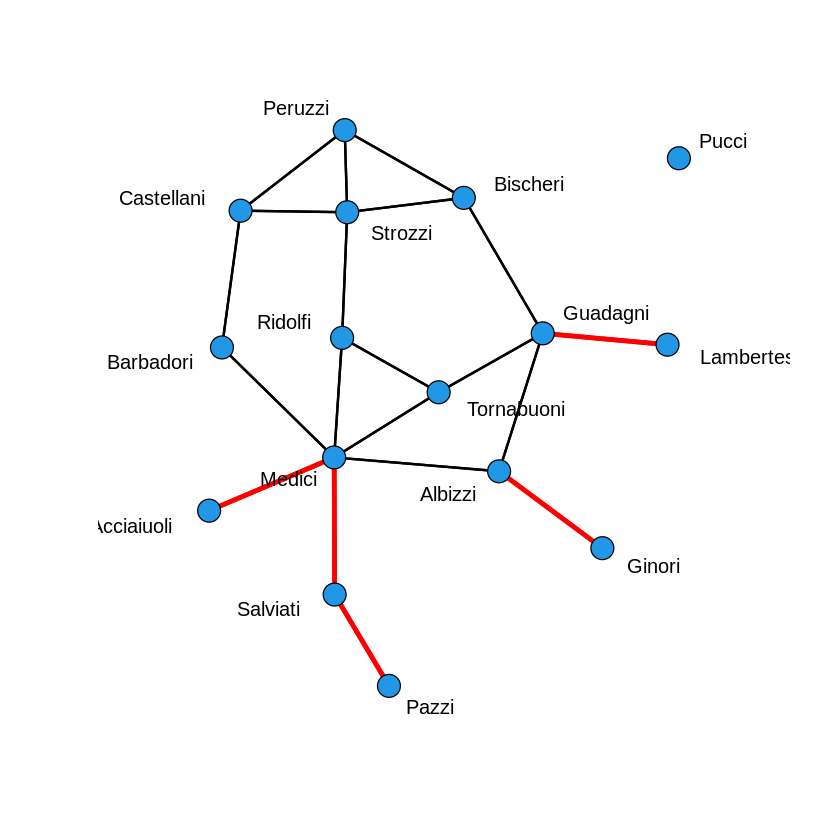

In [ ]:
# Точки сочлинения
cutpoints <- cutpoints(sociomatrix, mode="graph", return.indicator=TRUE)
gplot(sociomatrix, gmode="graph", vertex.col=cutpoints+3, displaylabels=TRUE, jitter=FALSE)

# Мосты
find_bridges <- function(net) {
  ecount <- network.edgecount(net)
  comp_original <- components(net)
  bridges <- logical(ecount)

  for(i in 1:ecount) {
    net_temp <- net
    delete.edges(net_temp, i)
    bridges[i] <- (components(net_temp) != comp_original)
  }

  return(bridges)
}

undirected_net <- network(sociomatrix, matrix.type="adjacency", directed=FALSE)
bridges_simple <- find_bridges(undirected_net)

gplot(net1,
      gmode="graph",
      vertex.col=4,
      displaylabels=TRUE,
      edge.col=ifelse(bridges_simple, "red", 1),
      edge.lwd=ifelse(bridges_simple, 3, 1),
      jitter = FALSE)

### 3. Вычисление значения централизации для каждой меры

In [43]:
isolated <- which(degree(undirected_net, gmode="graph") == 0)
unisolated_net <- undirected_net
delete.vertices(unisolated_net, isolated)

n <- network.size(unisolated_net)
deg <- degree(unisolated_net)
closeness_cent <- closeness(unisolated_net, gmode="graph")
between_cent <- betweenness(unisolated_net, gmode="graph")

# Вычисляем централизацию для каждой меры
cat("Централизация по степени:\n")
C_D <- sum(max(deg) - deg) / ((n - 1) * (n - 2))
cat("C_D =", C_D, "\n")
cat("Централизация по близости:\n")
C_С <- sum(max(closeness_cent) - closeness_cent) * (2*n - 3) / ((n - 1) * (n - 2))
cat("C_С =", C_С, "\n")
cat("Централизация по посреднечиству:\n")
C_B <- sum(max(between_cent) - between_cent) * 2 / ((n - 1) * (n - 1) * ( n- 2))
cat("C_B =", C_B, "\n")

Централизация по степени:
C_D = 0.5494505 
Централизация по близости:
C_С = 0.3224523 
Централизация по посреднечиству:
C_B = 0.4368132 


Централизация по степени равна 0.55, что близко к 0.5. Сеть имеет умеренную концентрацию связей: нет одной вершины, соединённой со всеми остальными, но и нет полностью равномерного распределения. Некоторые узлы имеют больше связей, чем другие, но без крайностей.

Централизация по близости составляет 0.32 — это относительно низкое значение. В сети нет явного центра, из которого можно было бы быстро достичь всех остальных вершин. Расстояния между узлами распределены достаточно равномерно, без явных "периферийных" вершин.

Централизация по посредничеству равна 0.44, что также близко к 0.5. Многие узлы выполняют роль посредников на путях между другими вершинами, но нет одного доминирующего узла, через который проходили бы почти все маршруты. Потоки в сети распределены между несколькими промежуточными вершинами.

**Общий вывод:** Сеть имеет сбалансированную структуру с умеренной иерархией. В ней есть узлы с большим влиянием, но ни один из них не доминирует полностью. Сеть устойчива к удалению отдельных вершин, поскольку функции центральности распределены между несколькими узлами.

### 4.  Исследовние сети на предмет подгрупп с помощью 𝑘-ядер.

Максимальный уровень k-ядра во всей сети:

[1] 4

coreness
 0  2  4 
 1  5 10 

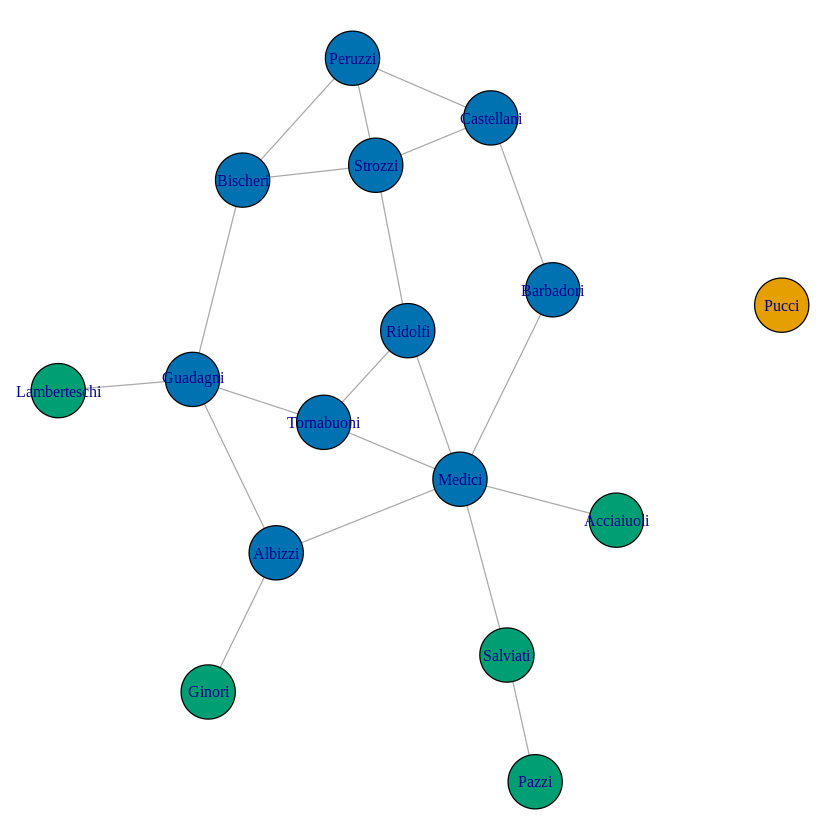

In [48]:
coreness <- coreness(inet)
max_core <- max(coreness)
cat("Максимальный уровень k-ядра во всей сети:")
max_core

table(coreness)

inet1 <- set_vertex_attr(g, name="color", value=coreness + 1)

vis <- par(mar=rep(0, 4))
plot(inet1, vertex.label.cex=0.8)
par(vis)

**Выводы:**
Сеть имеет трёхуровневую структуру:
1. Изолятор (1 вершина, 0-ядро)
2. Периферия/промежуточный слой (5 вершин, 2-ядро)
3. Плотное ядро (10 вершин, 4-ядро)

### 5. Исследование алгоритмов обнаружения сообществ и модулярность

Сводная таблица алгоритмов обнаружения сообществ:
------------------------------------------------------------ 
Алгоритм     Сообществ Модулярность
------------------------------------------------------------ 
Edge-betweenness     5               0.3975    
Leading eigenvector  4               0.3637    
Fast-greedy          4               0.3987    
------------------------------------------------------------ 


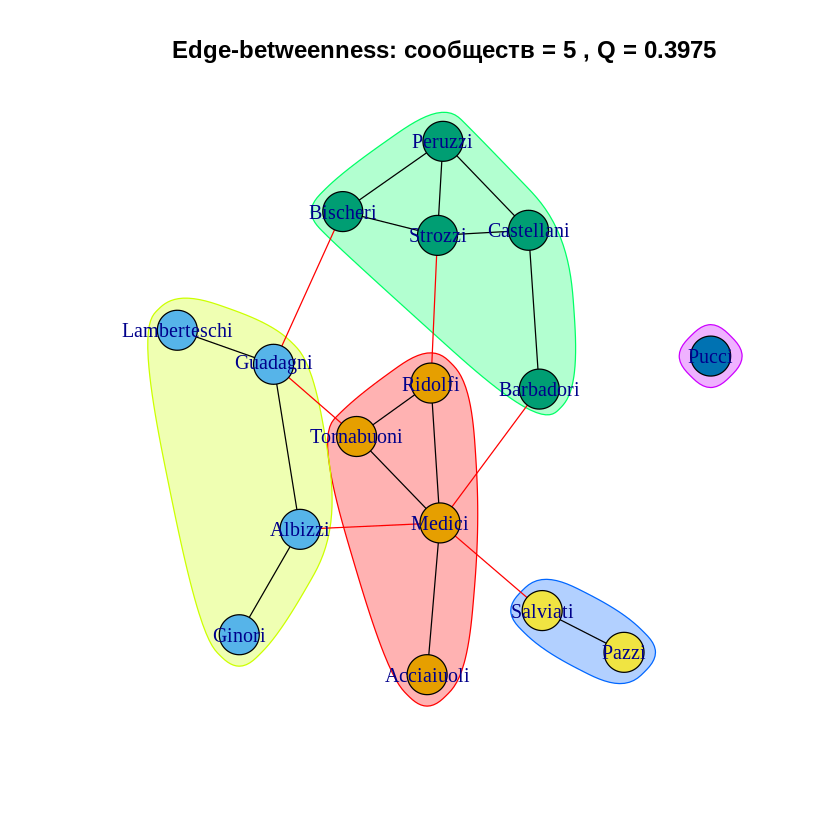

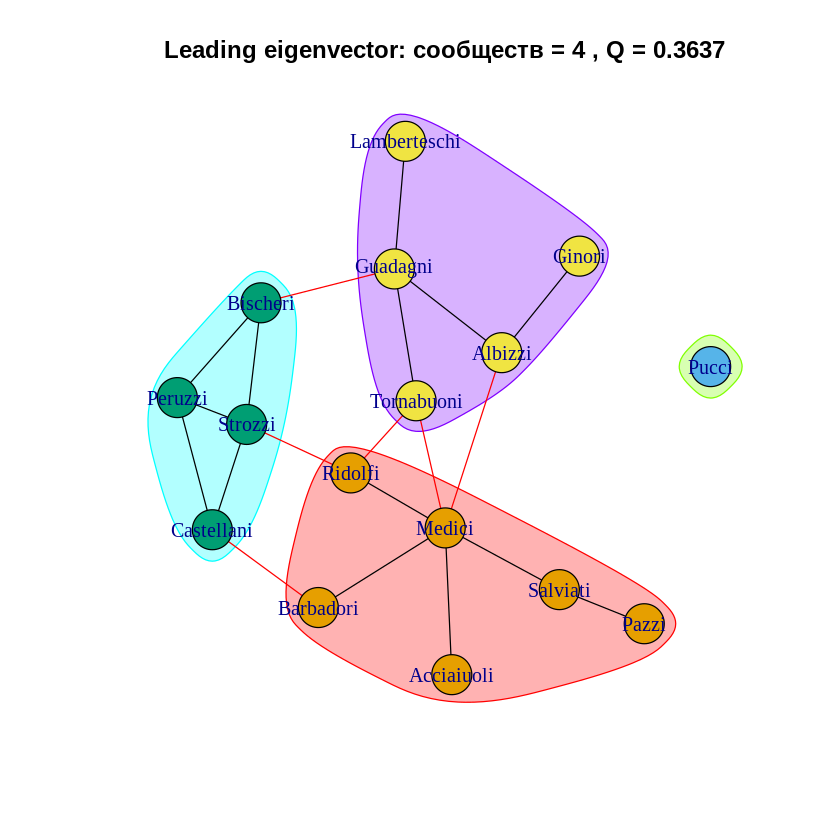

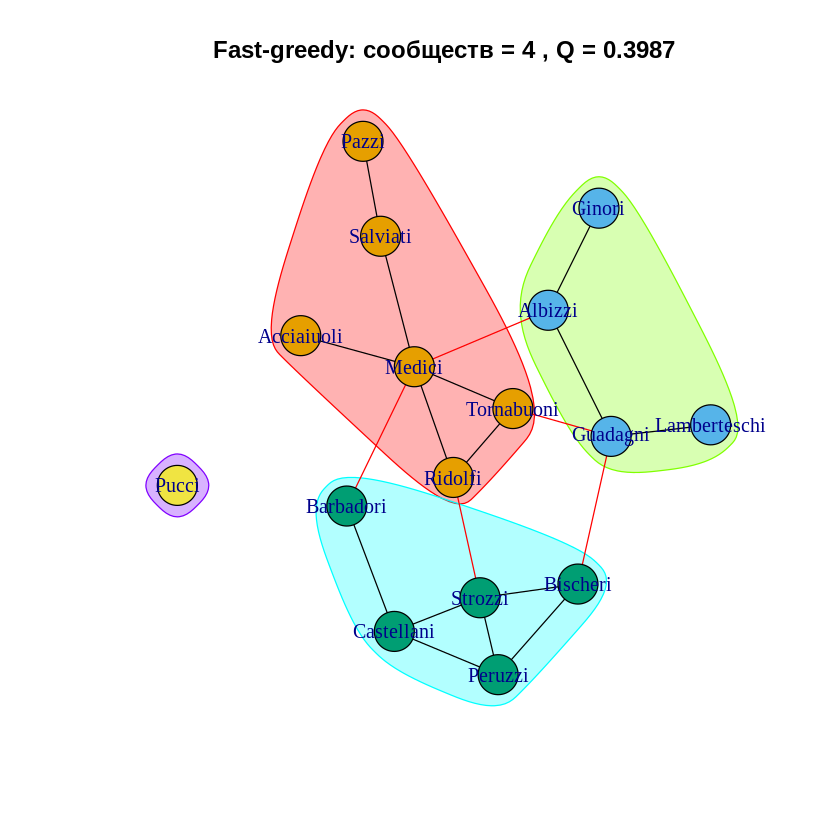

In [53]:
inet1 <- as_undirected(inet, mode="collapse")
V(inet1)$name <- colnames(data)

edge_betweenness <- cluster_edge_betweenness(inet1)
leading_eigen <- cluster_leading_eigen(inet1)
fast_greedy <- cluster_fast_greedy(inet1)

eb_str <- paste("Edge-betweenness: сообществ =", length(edge_betweenness), ", Q =", round(modularity(edge_betweenness), 4))
le_str <- paste("Leading eigenvector: сообществ =", length(leading_eigen), ", Q =", round(modularity(leading_eigen), 4))
fg_str <- paste("Fast-greedy: сообществ =", length(fast_greedy), ", Q =", round(modularity(fast_greedy), 4))

cat("Сводная таблица алгоритмов обнаружения сообществ:\n")
cat(strrep("-", 60), "\n")
cat(sprintf("%-20s %-15s %-10s\n", "Алгоритм", "Сообществ", "Модулярность"))
cat(strrep("-", 60), "\n")
cat(sprintf("%-20s %-15d %-10.4f\n", "Edge-betweenness", length(edge_betweenness), modularity(edge_betweenness)))
cat(sprintf("%-20s %-15d %-10.4f\n", "Leading eigenvector", length(leading_eigen), modularity(leading_eigen)))
cat(sprintf("%-20s %-15d %-10.4f\n", "Fast-greedy", length(fast_greedy), modularity(fast_greedy)))
cat(strrep("-", 60), "\n")


plot(edge_betweenness, inet1, main=eb_str)
plot(leading_eigen, inet1, main=le_str)
plot(fast_greedy, inet1, main=fg_str)

#### Описание алгоритмов:
**1. Edge-betweenness (Girvan-Newman)**

Постепенно удаляет рёбра с наибольшей промежуточностью — то есть рёбра, через которые проходит наибольшее количество кратчайших путей между всеми парами вершин.

**2. Leading eigenvector**

Анализирует главный собственный вектор для разделения вершин на две группы, затем рекурсивно применяет к подграфам.

**3. Fast-greedy**

Основан на жадной оптимизации модулярности. На каждом шаге объединяет два сообщества, которые дают максимальное увеличение модулярности.

#### Выводы:
Fast-greedy и Edge-betweenness алгоритмы показали практически одинаковую модулярность (0.3987 и 0.3975 соответственно), что говорит о схожем качестве разделения сети. Edge-betweenness выделил на одно сообщество больше, разделив одну из групп на две более мелкие подгруппы. Leading eigenvector алгоритм дал немного меньшее значение модулярности (0.3637), так как он использует другой математический подход и не оптимизирует модулярность напрямую.

### 6.  Извлечение данных из ceo.csv

In [94]:
# извлечени матрицы инцидентности
data2 <- read.csv("ceo.csv")
ceo_matrix <- as.matrix(data2, nrow=26, ncol=15, byrow=TRUE)
ceo_matrix

X0,X0.1,X1,X1.1,X0.2,X0.3,X0.4,X0.5,X1.2,X0.6,X0.7,X0.8,X0.9,X0.10,X0.11
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


### 7.  Сеть в виде биграфа

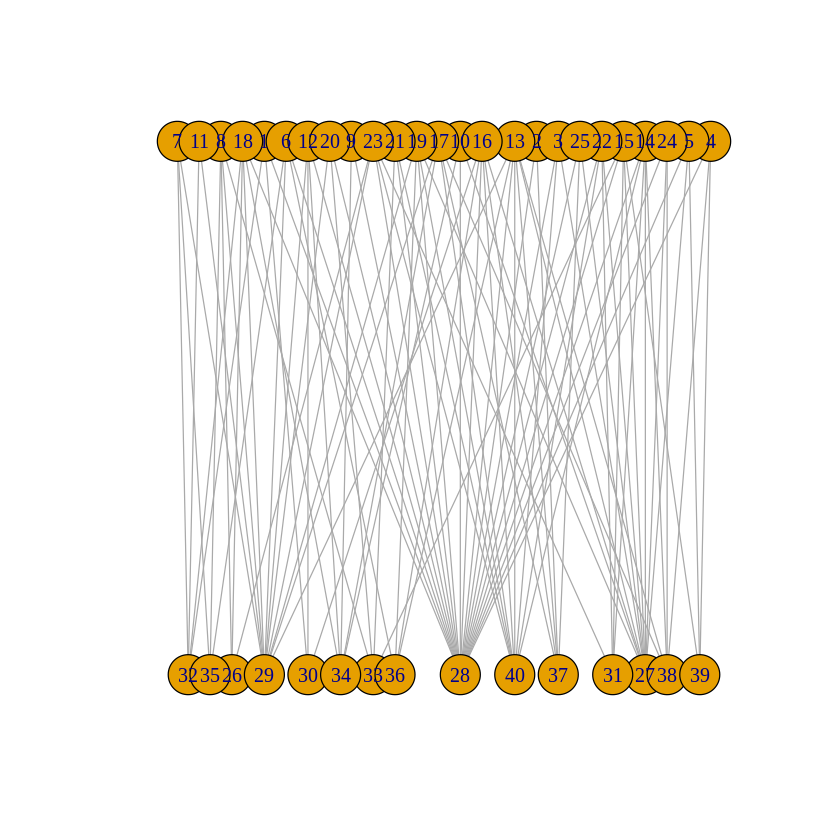

In [95]:
ceo_graph <- graph_from_biadjacency_matrix(ceo_matrix)
ceo_layout <- layout_as_bipartite(ceo_graph)

plot(ceo_graph, layout=ceo_layout)

### 9. Сеть аффилированности

In [96]:
ceo_graph.pr <- bipartite_projection(ceo_graph)
# Сеть совместного участия акторов
ceo_graph.pr$proj1
# Сеть перекрытия событий
ceo_graph.pr$proj2

IGRAPH 0740db4 U-W- 25 259 -- 
+ attr: weight (e/n)
+ edges from 0740db4:
  [1] 1-- 2 1-- 3 1-- 4 1-- 5 1-- 6 1-- 9 1--10 1--12 1--13 1--14 1--15 1--16
 [13] 1--18 1--19 1--20 1--21 1--22 1--23 1--24 1--25 1-- 7 1--11 2-- 3 2-- 4
 [25] 2-- 5 2-- 6 2-- 9 2--10 2--12 2--13 2--14 2--15 2--16 2--18 2--19 2--20
 [37] 2--21 2--22 2--23 2--24 2--25 2--17 3-- 5 3--10 3--13 3--14 3--15 3--16
 [49] 3--19 3--22 3--24 3--25 3-- 4 3-- 6 3-- 9 3--12 3--18 3--20 3--21 3--23
 [61] 3--17 4-- 5 4-- 6 4-- 9 4--10 4--12 4--13 4--14 4--15 4--16 4--18 4--19
 [73] 4--20 4--21 4--22 4--23 4--24 4--25 4--17 5--10 5--13 5--14 5--15 5--16
 [85] 5--19 5--22 5--24 5--25 5-- 6 5-- 9 5--12 5--18 5--20 5--21 5--23 6-- 9
+ ... omitted several edges

IGRAPH e221600 U-W- 15 66 -- 
+ attr: weight (e/n)
+ edges from e221600:
 [1]  1-- 4  1-- 8  1--10  1-- 3  1-- 7  1-- 9  1-- 6  1--15  2-- 3  2--15
[11]  2--14  2-- 9  2-- 4  2--11  2--12  2--13  2-- 6  2-- 8  2-- 5  3-- 5
[21]  3-- 7  3--12  3--15  3--13  3--14  3-- 4  3--10  3--11  3-- 9  3-- 6
[31]  3-- 8  4--10  4--11  4-- 7  4-- 8  4-- 5  4-- 9  4--12  4--13  4--15
[41]  4-- 6  5-- 7  5-- 9  5--11  5--12  5--15  6--13  6--15  6-- 8  6--14
[51]  7--10  7-- 9  8--10  8--14  8--15  9--12  9--13  9--15 10--11 11--12
[61] 11--13 11--15 12--13 12--15 13--14 13--15

[1] 25 25

0,1,1,1,1,1,1,0,1,1,⋯,2,0,2,1,1,1,1,1,1,1
1,0,1,1,1,1,0,0,1,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,0,1,2,1,0,0,1,2,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,0,2,1,0,0,1,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,2,2,0,1,0,0,1,2,⋯,2,0,1,2,1,1,2,1,2,2
1,1,1,1,1,0,2,2,1,1,⋯,2,1,2,3,2,1,1,2,1,1
1,0,0,0,0,2,0,2,0,0,⋯,0,1,2,1,1,0,0,1,0,0
0,0,0,0,0,2,2,0,0,0,⋯,0,1,2,1,2,1,0,2,0,0
1,1,1,1,1,1,0,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
1,1,2,1,2,1,0,0,2,0,⋯,2,1,2,2,1,1,2,1,2,2
1,0,0,0,0,1,2,1,0,0,⋯,0,1,2,1,1,0,0,1,0,0


[1] 15 15

0,0,2,3,0,1,1,1,1,1,0,0,0,0,1
0,0,11,2,1,3,0,1,1,0,3,3,3,2,6
2,11,0,7,3,4,2,3,4,1,4,4,4,3,8
3,2,7,0,1,1,3,2,3,3,3,2,2,0,4
0,1,3,1,0,0,1,0,1,0,1,1,0,0,1
1,3,4,1,0,0,0,1,0,0,0,0,1,1,3
1,0,2,3,1,0,0,0,1,1,0,0,0,0,0
1,1,3,2,0,1,0,0,0,1,0,0,0,1,1
1,1,4,3,1,0,1,0,0,0,0,1,1,0,1
1,0,1,3,0,0,1,1,0,0,1,0,0,0,0
0,3,4,3,1,0,0,0,0,1,0,2,1,0,3


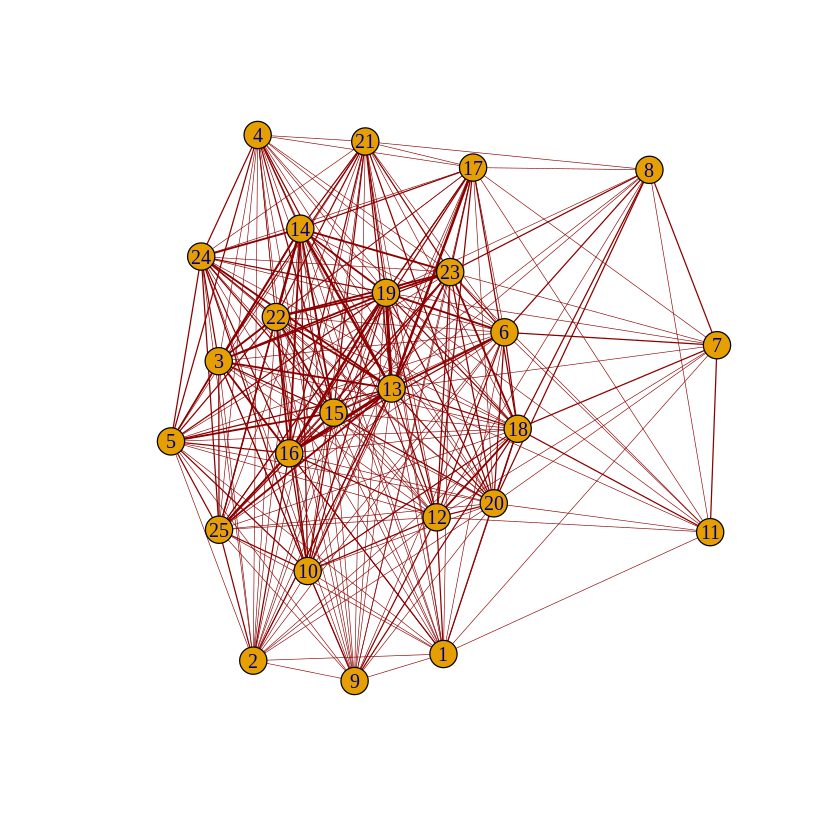

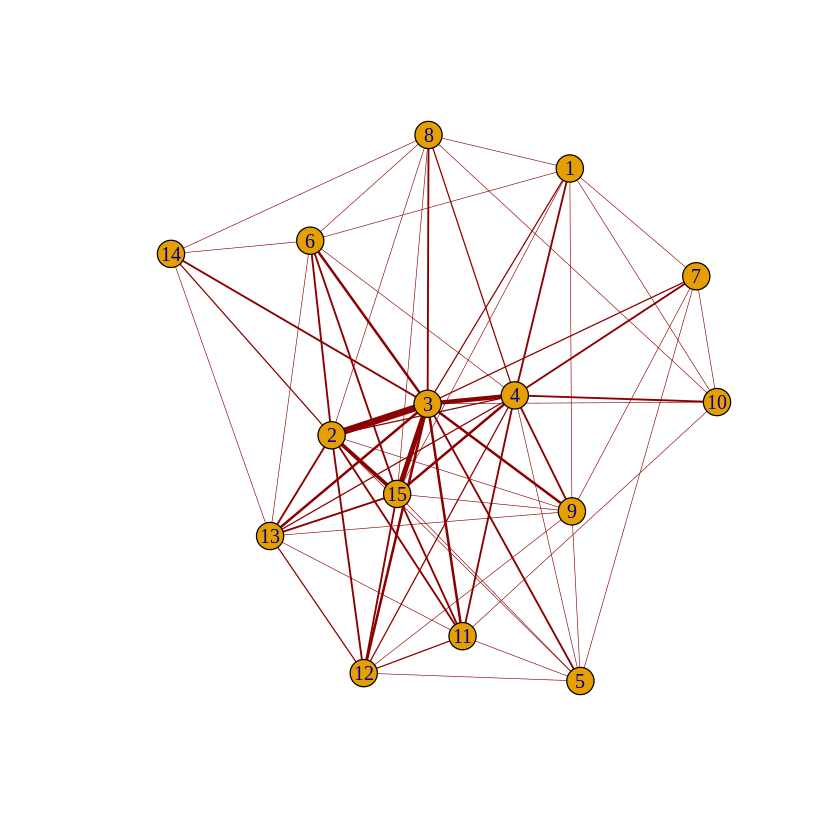

In [97]:
# матрица для сети совместного участия
ceo_proj1 <- as_adjacency_matrix(ceo_graph.pr$proj1, attr = "weight", sparse = FALSE)
dim(ceo_proj1)
ceo_proj1
# матрица для сети перекрытия событий
event_proj2 <- as_adjacency_matrix(ceo_graph.pr$proj2, attr = "weight", sparse = FALSE)
dim(event_proj2)
event_proj2

# cеть ceo с весами
plot(ceo_graph.pr$proj1, edge.width=E(ceo_graph.pr$proj1)$weight/2,
      edge.color="darkred", vertex.size=10)
# cеть событий с весами
plot(ceo_graph.pr$proj2, edge.width=E(ceo_graph.pr$proj2)$weight/2,
      edge.color="darkred", vertex.size=10)

CEO сеть показывает:
    
* Кто с кем часто пересекается на мероприятиях

Сеть событий показывает:
    
* Какие мероприятия привлекают схожую аудиторию

Веса рёбер количественно измеряют силу связей: чем толще ребро, тем больше связей оно имеет

### 10. Степень участия для каждого актора и среднее количество событий, с которыми актор аффилирован.

In [98]:
actors <- rowSums(ceo_matrix)
mean_actors <- mean(actors)

cat("Степени участия акторов:")
actors
cat("Среднее количество событий на актор")
round(mean_actors, 6)

Степени участия акторов:

[1] 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий на актор

[1] 3.8

**Вывод:** CEO участвует в среднем в 4 советах директоров одновременно

### 11. Вычисление размера и среднего размера для каждого события

In [99]:
participation <- colSums(ceo_matrix)
mean_participation <- mean(participation)

cat("Размеры событий:")
participation
cat("Среднее количество размера событий:")
round(mean_participation, 4)

Размеры событий:

X0  X0.1    X1  X1.1  X0.2  X0.3  X0.4  X0.5  X1.2  X0.6  X0.7  X0.8  X0.9 
    3    11    21    11     3     4     4     4     5     3     4     5     5 
X0.10 X0.11 
    3     9

Среднее количество размера событий:

[1] 6.3333

**Вывод:** Советы директоров в среднем состоят из 6-7 членов

### 12. Плотность для отношения совместного участия акторов и отношения перекрытия

In [103]:
density_ceo  <- edge_density(ceo_graph.pr$proj1)
density_club <- edge_density(ceo_graph.pr$proj2)

cat("Плотность сети совместного участия директоров: ", round(density_ceo, 6), "\n")
cat("Плотность сети перекрытия клубов:", round(density_club, 6), "\n")

Плотность сети совместного участия директоров:  0.863333 
Плотность сети перекрытия клубов: 0.628571 


#### Интерпритация полученных результатов:
* CEO образуют почти полную сеть (плотность почти 90%)
* Советы директоров сильно перекрываются - много общих членов между разными компаниями (~63%)

### 13. Диаметр сети аффилированности

In [107]:
diameter_ceo <- diameter(ceo_graph.pr$proj1)
diameter_event <- diameter(ceo_graph.pr$proj2)

cat("Диаметр сети СЕО:", diameter_ceo, "\n")
cat("Диаметр сети событий:", diameter_event, "\n")

Диаметр сети СЕО: 3 
Диаметр сети событий: 4 


### 14. Логарифм отношение шансов

In [109]:
n_ceo <- nrow(ceo_matrix)
n_clubs <- ncol(ceo_matrix)

logOR <- matrix(0, nrow=n_clubs, ncol=n_clubs)

for (i in 1:(n_clubs - 1)) {
  for (j in (i + 1):n_clubs) {
    a <- sum(ceo_matrix[, i] & ceo_matrix[, j]) + 0.5
    b <- sum(ceo_matrix[, i] & !ceo_matrix[, j]) + 0.5
    c <- sum(ceo_matrix[, j] & !ceo_matrix[, i]) + 0.5
    d <- sum(!ceo_matrix[, i] & !ceo_matrix[, j]) + 0.5

    or <- (a * d)/(b * c)
    logOR[i, j] <- logOR[j, i] <- round(log(or), 2)
  }
}
print(logOR)

       [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
 [1,]  0.00 -1.95 -1.21  2.48 -0.23  1.21  1.21  1.21  0.90  1.59 -0.53 -0.79
 [2,] -1.95  0.00  2.29 -1.88 -0.34  1.31 -2.29 -0.76 -1.10 -1.95  1.31  0.72
 [3,] -1.21  2.29  0.00 -2.86  0.53  0.84 -2.05 -0.82 -0.51 -2.61  0.84 -0.51
 [4,]  2.48 -1.88 -2.86  0.00 -0.34 -0.76  1.31  0.27  0.72  2.48  1.31 -0.15
 [5,] -0.23 -0.34  0.53 -0.34  0.00 -0.53  1.21 -0.53  0.90 -0.23  1.21  0.90
 [6,]  1.21  1.31  0.84 -0.76 -0.53  0.00 -0.84  0.82 -1.10 -0.53 -0.84 -1.10
 [7,]  1.21 -2.29 -2.05  1.31  1.21 -0.84  0.00 -0.84  0.51  1.21 -0.84 -1.10
 [8,]  1.21 -0.76 -0.82  0.27 -0.53  0.82 -0.84  0.00 -1.10  1.21 -0.84 -1.10
 [9,]  0.90 -1.10 -0.51  0.72  0.90 -1.10  0.51 -1.10  0.00 -0.79 -1.10  0.20
[10,]  1.59 -1.95 -2.61  2.48 -0.23 -0.53  1.21  1.21 -0.79  0.00  1.21 -0.79
[11,] -0.53  1.31  0.84  1.31  1.21 -0.84 -0.84 -0.84 -1.10  1.21  0.00  1.67
[12,] -0.79  0.72 -0.51 -0.15  0.90 -1.10 -1.10 -1.10  0.20 -0.7

**Вывод:** присутствуют как сильные связи, так и обособленность, о которой свидетельствует наличие отрицательных значений

## Общий вывод

В ходе работы освоены ключевые методы сетевого анализа с использованием пакетов igraph и sna, включая преобразование данных между матрицами инцидентности, двудольными графами и их взвешенными проекциями, визуализацию сетей с применением специализированных раскладок для двудольных структур, вычисление структурных характеристик (плотность, диаметр, средняя длина пути), анализ центральности через степени вершин и взвешенные связи, выявление подгрупп методами k-ядерного анализа, а также сравнение алгоритмов обнаружения сообществ (Fast-greedy, Edge-betweenness, Leading eigenvector) с оценкой их качества через модулярность.